In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


$\textbf{Definition (Period q Point/Orbit) }$A point $\bar{U}$ is a period q point for a dynamical system if $S^q\bar{U} = \bar{U}$ and $S^r\bar{U} \neq \bar{U}$ for $0 < r <q$, where $S: \mathbb{R}^p \to \mathbb{R}^P$ is a evolution semigroup. If $\bar{U}$ is a period q point then the set $\{ \bar{U},S^1\bar{U},S^2\bar{U},\dots,S^{q-1}\bar{U}\}$ is called a period q orbit.

![bifurcation](period_doubling_bifurcation.png)

### Period-Doubling Bifurcation
https://github.com/fccoelho/sistemas_dinamicos_aplicados/tree/master/Sage

#### Mapa quadrático
Como um segundo exemplo, vamos considerar o mapa quadrático:
$$U_{n+1}=a U_n (1-U_n), \,\,\, U_0=U$$

In [11]:
qmap = lambda u,a: a*u*(1-u)
@interact
def quad_map(a=slider(0.5,4.5,.1,1.1, label='$a$'), u0=slider(0,1,.1,.1, label='$U_0$'), n=slider(10,300,1,100, label='Iterações:')):
    pts = [(u0, qmap(u0,a))]
    for i in range(1,n+1):
        nu = qmap(pts[-1][1],a)
        pts.append((i,nu))
    p = points(pts,axes_labels=['$n$', '$U_n$'])
    show("Uf= ",pts[-1][1])
    show(p)

Interactive function <function quad_map at 0x7f0867e2d430> with 3 widgets
  a: FloatSlider(value=1.1, min=0.5,…

![feigenbaum](feigenbaum.png)

#### Sensitivity to Initial Conditions

In [35]:
qmap = lambda u,a: a*u*(1-u)

@interact
def quad_map(a=slider(0.5,4.5,.1,3.8, label='$a$'), u0=slider(0,4.5,.0001,0.5, label='$U_0$'), v0=slider(0,4.5,.0001,0.5001, label='$V_0$'), n=slider(10,300,1,100, label='Iterações:')):
    pts = [(0, qmap(u0,a))]
    for i in range(1,n+1):
        nu = qmap(pts[-1][1],a)
        pts.append((i,nu))
    p = points(pts,axes_labels=['$n$', '$U_n$'])
    
    pts_v = [(0, qmap(v0,a))]
    for i in range(1,n+1):
        nu = qmap(pts_v[-1][1],a)
        pts_v.append((i,nu))
    p_v = points(pts_v,axes_labels=['$n$', '$V_n$'])
    
    diferenca = [(0, u0-v0)]
    for i in range(n):
        nu = pts[i][1] - pts_v[i][1]
        
        diferenca.append((i,nu))
        
    p_dif = points(diferenca,axes_labels=['$n$', '$U_n - V_n$'])

    show("U0= ",u0)
    show("V0= ",v0)
    
    ga = graphics_array((p,p_v))
    ga.show(figsize=[10,5])
    show(p_dif)

Interactive function <function quad_map at 0x7f0865eac940> with 4 widgets
  a: FloatSlider(value=3.8, min=0.5,…

![feigenbaum](sensitivity.png)

![sen_orbit](sen_orbit.png)

![lyapunov](lyapunov.png)

https://ipython-books.github.io/121-plotting-the-bifurcation-diagram-of-a-chaotic-dynamical-system/

In [52]:
def q_map(r, x):
    return r * x * (1 - x)

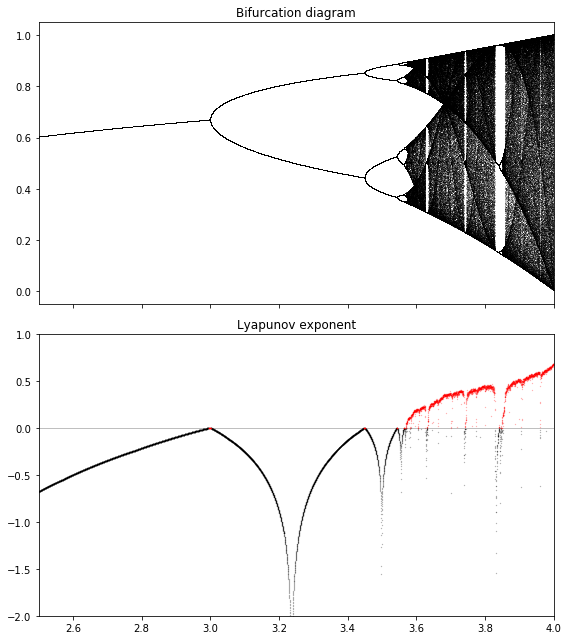

In [53]:
n = 10000
iterations = 1000
last = 100
r = np.linspace(2.5, 4.0, n)
x = 1e-5 * np.ones(n)
lyapunov = np.zeros(n)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9),
                               sharex=True)
for i in range(iterations):
    x = q_map(r, x)
    # We compute the partial sum of the
    # Lyapunov exponent.
    lyapunov += np.log(abs(r - 2 * r * x))
    # We display the bifurcation diagram.
    if i >= (iterations - last):
        ax1.plot(r, x, ',k', alpha=.25)
ax1.set_xlim(2.5, 4)
ax1.set_title("Bifurcation diagram")

# We display the Lyapunov exponent.
# Horizontal line.
ax2.axhline(0, color='k', lw=.5, alpha=.5)
# Negative Lyapunov exponent.
ax2.plot(r[lyapunov < 0],
         lyapunov[lyapunov < 0] / iterations,
         '.k', alpha=.5, ms=.5)
# Positive Lyapunov exponent.
ax2.plot(r[lyapunov >= 0],
         lyapunov[lyapunov >= 0] / iterations,
         '.r', alpha=.5, ms=.5)
ax2.set_xlim(2.5, 4)
ax2.set_ylim(-2, 1)
ax2.set_title("Lyapunov exponent")
plt.tight_layout()

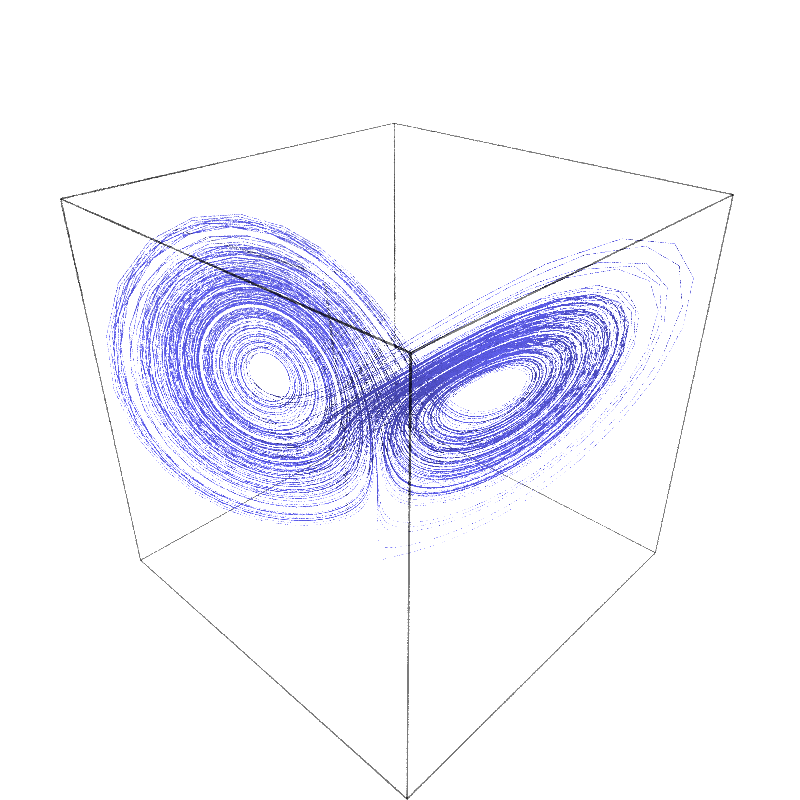

In [9]:
Integer = int
RealNumber = float

def lorenz(t,y,params):
    return [params[0]*(y[1]-y[0]),y[0]*(params[1]-y[2])- y[1],y[0]*y[1]-params[2]*y[2]]

def lorenz_jac(t,y,params):
    return [ [-params[0],params[0],0],[(params[1]-y[2]),-1,-y[0]],
[y[1],y[0],-params[2]],[0,0,0]]

T=ode_solver()
T.algorithm="bsimp"
T.function=lorenz
T.jacobian=lorenz_jac
T.ode_solve(y_0=[.5,.5,.5],t_span=[0,155],params=[10,40.5,3],num_points=10000)
l=[T.solution[i][1] for i in range(len(T.solution))]

line3d(l,thickness=0.3, viewer='tachyon', figsize=8) 